In [ ]:
# Copyright (c) 2025, ETH Zurich

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import scipy.ndimage
from tqdm import tqdm
import spekpy as spk
import h5py
import json
from scipy import interpolate

import spekpy as sp
from scipy.interpolate import griddata

In [2]:
rave_sim_dir = Path('../rave-sim').resolve()

sys.path.insert(0, str(rave_sim_dir / "nist_lookup"))
from nist_lookup.xraydb_plugin import xray_delta_beta

In [3]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
import multisim
import config
import util
import propagation


In [4]:
h = 6.62607004 * 10**(-34) # planck constant in mˆ2 kg / s
c_0 = 299792458 # speed of light in m / s
eV_to_joule = 1.602176634*10**(-19)
N_A = 6.02214086 * 10**23 #[1/mol]

In [5]:
# def mu_SU8(eng):
#     return xray_delta_beta('C25H34O8', 1.18, eng)[0]

def mu_SU8(eng):
    lambda_ = h * c_0 / (eng*eV_to_joule)
    beta = xray_delta_beta('C21H25ClO5', 1.18, eng)[1]
    return 4 * np.pi / lambda_ * beta
#C21H25ClO5

def mu_PMMA(eng):
    lambda_ = h * c_0 / (eng*eV_to_joule)
    beta = xray_delta_beta("C5H8O2", 1.19, eng)[1]
    return 4 * np.pi / lambda_ * beta

def mu_Si(eng):
    lambda_ = h * c_0 / (eng*eV_to_joule)
    beta = xray_delta_beta("Si", 2.34, eng)[1]
    return 4 * np.pi / lambda_ * beta

def delta_SU8(eng):
    return xray_delta_beta('C21H25ClO5', 1.18, eng)[0]

def delta_PMMA(eng):
    return xray_delta_beta("C5H8O2", 1.19, eng)[0]

def delta_Si(eng):
    return xray_delta_beta("Si", 2.34, eng)[0]

def delta_h2o(eng):
    return xray_delta_beta("H2O", 1.0, eng)[0]


In [6]:
energies = np.arange(11000, 71000, 1000)
su8 = mu_SU8(energies)
pmma = mu_PMMA(energies)
si = mu_Si(energies)

su8_delta = delta_SU8(energies)
pmma_delta = delta_PMMA(energies)
si_delta = delta_Si(energies)
h2o_delta = delta_h2o(energies)

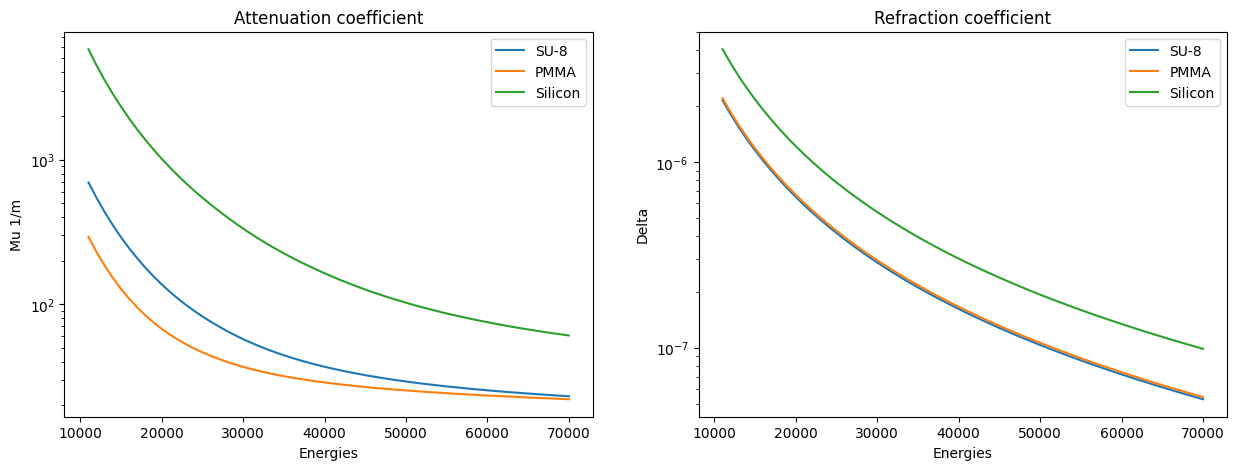

In [7]:
fig, axs = plt.subplots(figsize=(15,5), ncols = 2)

axs[0].plot(energies,su8, label ='SU-8')
axs[0].plot(energies,pmma, label ='PMMA')
axs[0].plot(energies,si, label = 'Silicon')
axs[0].legend()

axs[0].set_xlabel('Energies')
axs[0].set_ylabel('Mu 1/m')
axs[0].set_title('Attenuation coefficient')
axs[0].set_yscale('log')

axs[1].plot(energies,su8_delta, label ='SU-8')
axs[1].plot(energies,pmma_delta, label ='PMMA')
axs[1].plot(energies,si_delta, label = 'Silicon')
#axs[1].plot(energies,h2o_delta, label = 'H2O')

axs[1].legend()

axs[1].set_xlabel('Energies')
axs[1].set_ylabel('Delta')
axs[1].set_title('Refraction coefficient')
axs[1].set_yscale('log')

In [8]:
s = sp.Spek(kvp=70, dk = 0.1, th = 10, z = 15, mas = 150*20)
s.filter('Al', 3) # Create a spectrum
k, f = s.get_spectrum(edges=True, diff = True, flu = True) # Get the spectrum
tube_spectrum_txt = interpolate.interp1d(k*1e3, f, fill_value = 'extrapolate')
spec_txt = tube_spectrum_txt(energies)# * np.exp(-mu_ai(energies) * 0.003)


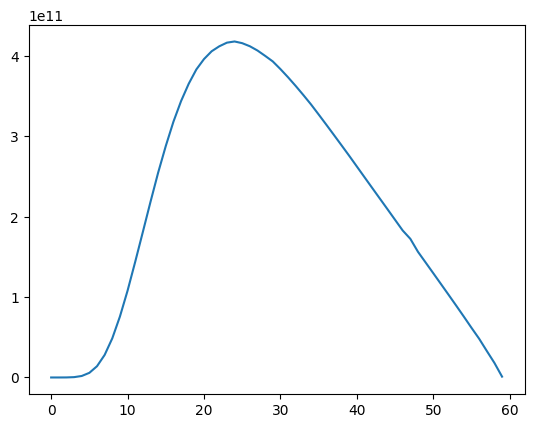

In [9]:
plt.plot(spec_txt)

In [10]:
 np.sum(np.exp(-pmma * 400e-6) * spec_txt)/ np.sum(np.exp(-su8 * 400e-6) * spec_txt) 

1.0053881381092455

Text(0.5, 1.0, 'Refraction coefficient')

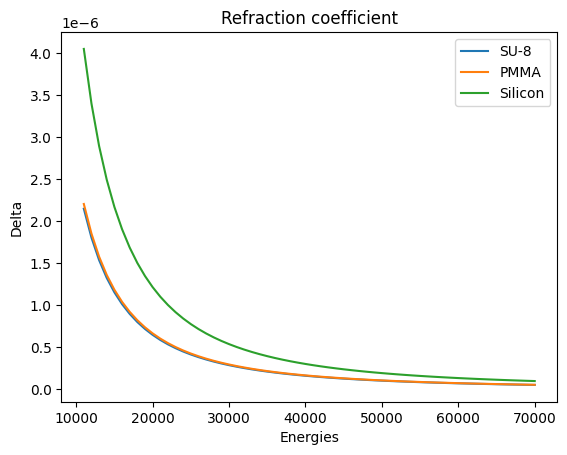

In [11]:
plt.plot(energies,su8_delta, label ='SU-8')
plt.plot(energies,pmma_delta, label ='PMMA')
plt.plot(energies,si_delta, label = 'Silicon')
plt.legend()

plt.xlabel('Energies')
plt.ylabel('Delta')
plt.title('Refraction coefficient')